In [1]:
# Import system packages
import os
import sys
import time
import logging
import importlib

#Import data manipulation libraries
import numpy as np
import pandas as pd
import collections
from tqdm import tqdm

#Import visualization libraries
import matplotlib.pyplot as plt

#Importing ML/DL libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,precision_recall_fscore_support, average_precision_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix,accuracy_score

import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import layer

from tensorflow.keras import initializers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Input, BatchNormalization, LeakyReLU, Dense, Reshape, Flatten, Activation 
from tensorflow.keras.layers import Dropout, multiply, GaussianNoise, MaxPooling2D, concatenate
import pickle

import random


In [2]:
df = pd.read_csv("C:/Users/GC/creditcard.csv")

In [3]:
df 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, 
                                                    df['Class'],
                                                    test_size = 0.20, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [6]:
# check how many anomalies are in our Testing set
print("x_train.shape: ", x_train.shape)
print("x_test.shape ", x_test.shape)
print("y_train.shape ", y_train.shape)
print("y_test.shape ", y_test.shape)

x_train.shape:  (227845, 31)
x_test.shape  (56962, 31)
y_train.shape  (227845,)
y_test.shape  (56962,)


In [7]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
193580,130198.0,-0.799840,0.475496,0.945912,0.360518,0.849287,-0.022402,0.946082,-0.118777,-0.132950,...,-0.211023,-0.301974,0.365713,-0.575632,-0.598082,-1.066174,0.020482,-0.058998,72.40,0
281512,170229.0,1.606285,-0.703248,-0.394818,1.486715,-0.788096,-0.504766,-0.227999,-0.115749,0.882403,...,0.335594,0.713657,-0.021267,0.040442,-0.156591,-0.583700,0.022747,0.002051,188.10,0
83404,59834.0,1.281666,0.069899,-0.068433,-0.118893,-0.178783,-0.795593,0.142466,-0.089915,-0.153660,...,-0.428059,-1.371226,0.159838,-0.059506,0.088230,0.631566,-0.111973,-0.012174,8.48,0
131366,79575.0,-0.247623,1.192310,0.733828,-0.278547,0.832577,-0.141225,0.796655,-0.069621,-0.526500,...,-0.336441,-0.825071,-0.196949,-1.027739,0.078189,0.153566,0.252257,0.087571,6.99,0
169064,119510.0,2.109995,0.161872,-1.950143,0.263848,0.775884,-0.440883,0.182684,-0.192945,0.477652,...,-0.394579,-1.001854,0.267583,-0.111757,-0.179542,0.213154,-0.057794,-0.036438,1.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63856,50895.0,-0.043734,-0.551311,1.569492,-1.903996,-1.151121,-0.053123,-0.499013,0.135010,-2.136722,...,-0.343545,-0.583264,-0.013246,-0.049053,-0.101647,-0.366528,0.056215,0.013936,30.00,0
81968,59183.0,1.140277,-0.004898,0.072729,0.918752,-0.129861,-0.042564,-0.127994,0.223495,0.153317,...,0.066068,0.058538,-0.107472,-0.369613,0.528540,-0.288810,0.004279,0.001099,24.60,0
140036,83502.0,-0.754934,-1.802975,0.866239,-1.690596,-3.007219,1.865597,0.741822,0.098395,-1.798257,...,0.243652,1.268334,0.620800,-0.282679,-1.342805,-0.245118,0.375048,0.193864,533.50,0
202552,134383.0,2.051854,-1.051863,-2.279919,-1.689759,-0.048993,-0.868512,0.092609,-0.329633,-0.646595,...,-0.291720,-0.583088,0.081217,0.366751,-0.048046,0.634649,-0.124288,-0.065370,110.24,0


In [8]:
# Normalize the above splits using the MinMaxScaler from the scikit learn package
scaler = MinMaxScaler()

# Make sure to only fit the scaler on the training data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Creating dataset dictionary 
dataset = {}
dataset['x_train'] = x_train.astype(np.float32)
dataset['y_train'] = y_train.astype(np.float32)
dataset['x_test']  = x_test.astype(np.float32)
dataset['y_test']  = y_test.astype(np.float32)

In [9]:
y_train.value_counts()

Class
0    227462
1       383
Name: count, dtype: int64

In [10]:
y_test.value_counts()

Class
0    56853
1      109
Name: count, dtype: int64

In [11]:
NUM_COL = 31

In [12]:
#Setting the Hyperparameters

#learning_rate = 0.00001
learning_rate = 0.0001
batch_size = 512
epochs = 10
adam = Adam(learning_rate = learning_rate, beta_1 = 0.5)

In [13]:
# Defining the Generator network

def get_generator(optimizer):
    
    generator = Sequential()
    generator.add(Dense(64, input_dim=NUM_COL, kernel_initializer=initializers.glorot_normal(seed=42)))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(128))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
       
    generator.add(Dense(512))
    generator.add(Activation('tanh'))
   
    generator.add(Dense(NUM_COL, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    
    return generator

In [14]:
##### Defining the Discriminator network

def get_discriminator(optimizer):
    
    discriminator = Sequential()
    
    discriminator.add(Dense(256, input_dim=NUM_COL, kernel_initializer=initializers.glorot_normal(seed=42)))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
       
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(1))
    discriminator.add(Activation('sigmoid'))
   
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

    return discriminator

In [15]:
def get_gan_network(discriminator, generator, optimizer,input_dim=NUM_COL):

    discriminator.trainable = False   
    gan_input = Input(shape=(input_dim,))  
    x = generator(gan_input)        
    gan_output = discriminator(x)
    
    gan = Model(inputs=gan_input, outputs=gan_output)    
    gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    
    
    return gan

In [16]:
#Training the GAN
x_train, y_train, x_test, y_test = dataset['x_train'], dataset['y_train'],dataset['x_test'],dataset['y_test']

#Calculating the number of batches based on the batch size
batch_count = x_train.shape[0] // batch_size
pbar = tqdm(total= epochs * batch_count)
gan_loss = []
discriminator_loss = []

#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam,input_dim=NUM_COL)


for epoch in range(epochs):        
    for index in range(batch_count):        
        pbar.update(1)        
        # Creating a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size,NUM_COL])
        
        # Generate fake samples
        generated_images = generator.predict_on_batch(noise)
        
        #Obtain a batch of normal network packets
        image_batch = x_train[index * batch_size: (index + 1) * batch_size]
            
        X = np.vstack((generated_images,image_batch))       
        y_dis = np.ones(2*batch_size) 
        y_dis[:batch_size] = 0

        # Train discriminator
        discriminator.trainable = True
        d_loss= discriminator.train_on_batch(X, y_dis)

        # Train generator
        noise = np.random.uniform(0, 1, size=[batch_size, NUM_COL])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)
        
        #Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)
        
    print("Epoch %d Batch %d/%d [D loss: %f] [G loss:%f]" % (epoch,index,batch_count, d_loss, g_loss))              

 10%|███▉                                   | 447/4450 [00:26<03:15, 20.52it/s]

Epoch 0 Batch 444/445 [D loss: 0.503927] [G loss:0.661978]


 20%|███████▊                               | 893/4450 [00:49<02:59, 19.86it/s]

Epoch 1 Batch 444/445 [D loss: 0.529857] [G loss:0.999503]


 30%|███████████▍                          | 1339/4450 [01:12<02:34, 20.17it/s]

Epoch 2 Batch 444/445 [D loss: 0.556297] [G loss:1.033576]


 40%|███████████████▏                      | 1784/4450 [01:35<02:16, 19.58it/s]

Epoch 3 Batch 444/445 [D loss: 0.481465] [G loss:2.790337]


 50%|███████████████████                   | 2229/4450 [01:58<01:50, 20.05it/s]

Epoch 4 Batch 444/445 [D loss: 0.000517] [G loss:18.154974]


 60%|██████████████████████▊               | 2672/4450 [02:21<01:30, 19.56it/s]

Epoch 5 Batch 444/445 [D loss: 0.000282] [G loss:26.429853]


 70%|██████████████████████████▋           | 3118/4450 [02:44<01:07, 19.78it/s]

Epoch 6 Batch 444/445 [D loss: 0.000124] [G loss:36.249722]


 80%|██████████████████████████████▍       | 3563/4450 [03:08<00:48, 18.13it/s]

Epoch 7 Batch 444/445 [D loss: 0.000021] [G loss:34.820953]


 90%|██████████████████████████████████▏   | 4007/4450 [03:31<00:22, 19.91it/s]

Epoch 8 Batch 444/445 [D loss: 0.000009] [G loss:43.880089]


100%|█████████████████████████████████████▉| 4448/4450 [03:54<00:00, 20.47it/s]

Epoch 9 Batch 444/445 [D loss: 0.000014] [G loss:48.299919]


100%|██████████████████████████████████████| 4450/4450 [04:10<00:00, 20.47it/s]

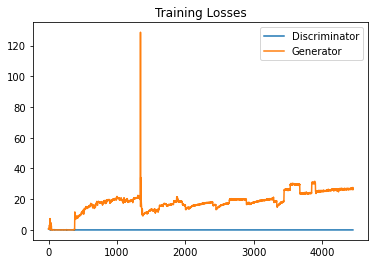

In [70]:
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.title("Training Losses")
plt.legend()

In [71]:
# Predictions on the test set

nr_batches_test = np.ceil(x_test.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):    
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = x_test[ran_from:ran_to]             
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=128,verbose=0)        
        results = np.append(results, tmp_rslt)   


100%|██████████████████████████████████████| 4450/4450 [04:19<00:00, 19.01it/s]

In [72]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(results),pd.DataFrame(y_test)], axis=1)
results_df.columns = ['results','y_test']
print ('Mean score for normal data :', results_df.loc[results_df['y_test'] == 0, 'results'].mean() )
print ('Mean score for anomalous data :', results_df.loc[results_df['y_test'] == 1, 'results'].mean())

Mean score for normal packets : 0.9999999931578846
Mean score for anomalous packets : 1.0


In [73]:
#Obtaining the lowest 1% score
per = np.percentile(results,1)
y_pred = results.copy()
y_pred = np.array(y_pred)

#Thresholding based on the score
inds = (y_pred > per)
inds_comp = (y_pred <= per)
y_pred[inds] = 0
y_pred[inds_comp] = 1

In [74]:
precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(y_test, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.0019135564060250693
Precision : 0.0019135564060250693
Recall : 1.0
F1 : 0.0038198034027789943


Confusion Matrix :


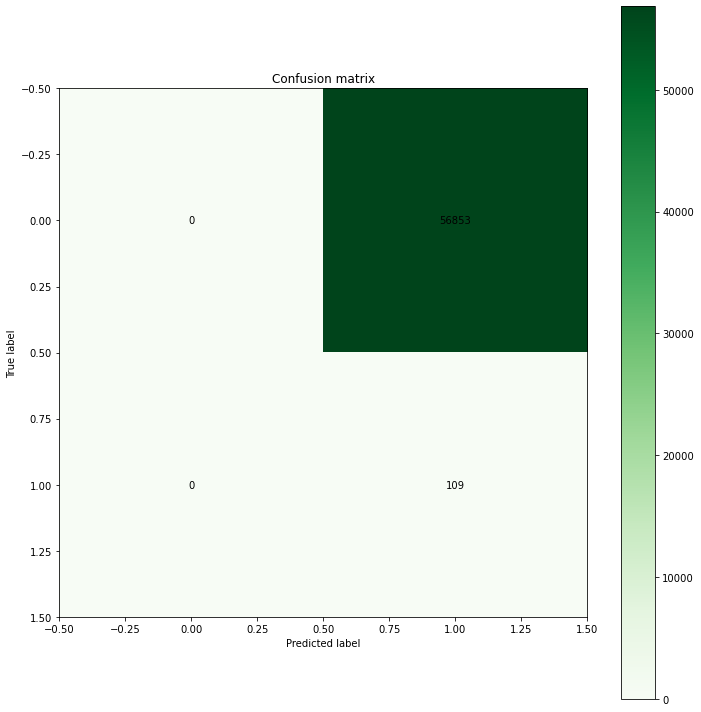

In [75]:
cm = confusion_matrix(y_test, y_pred)

print ('Confusion Matrix :')

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.figure(figsize=(10,10),)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm)

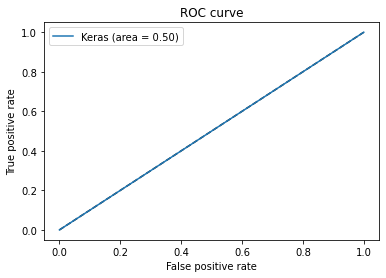

In [76]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.2f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()